### corner 검출 (Harris, GFTT, FAST)
 - flat, edge는 고유한 위치를 찾기 어려움.
 - corner는 변별력이 높은 편이며 영상의 이동, 회전 변환에 강인함

1. 해리스는 초기버젼이지만 뼈대를 잡아놓은 방식
3. FAST - https://www.edwardrosten.com/work/fast.html
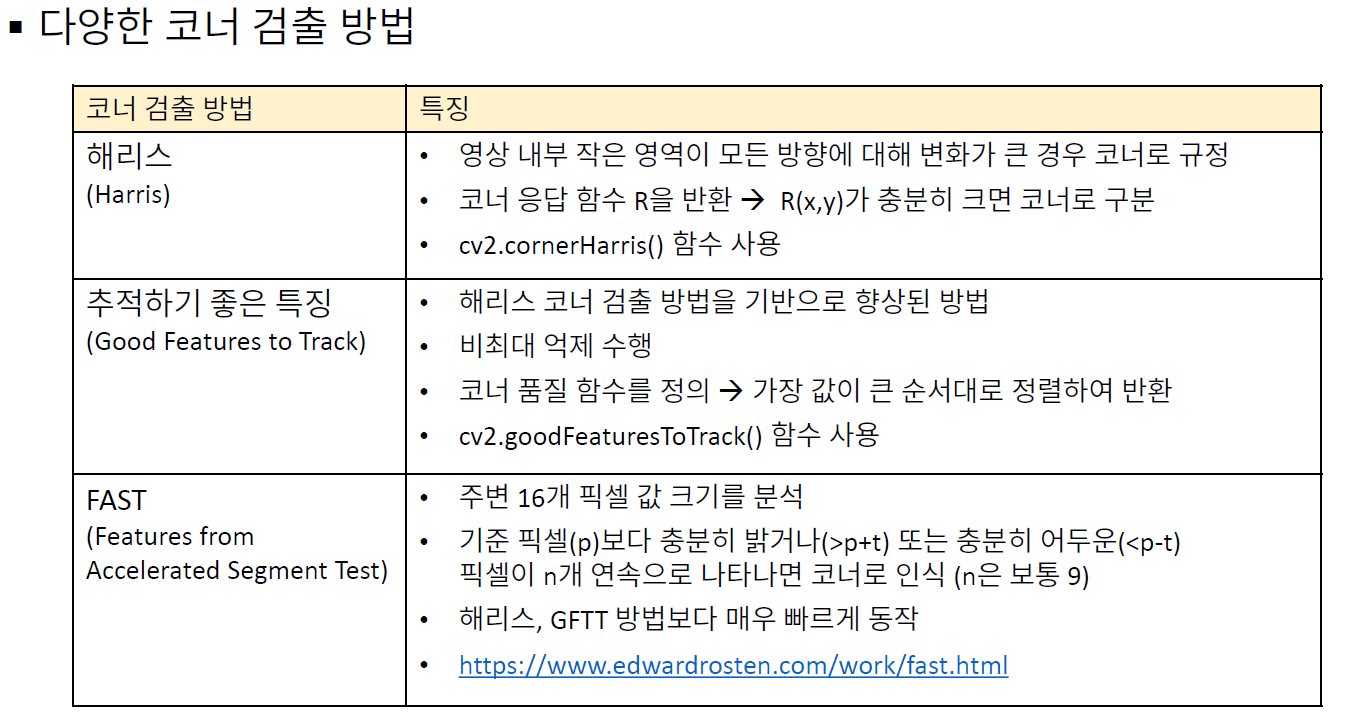

**``` cv2.cornerHarris(src,blockSize, ksize, k,dst=None, borderType=None) -> dst```**
 - src : 입력 단일채널 8비트 or 실수형
 - blockSize: 코너응답함수 계산에서 고려할 이웃 픽셀 크기 2~5
 - ksize : 소벨연산자 커널크기 (3) 
 - k : 해리스 코너 검출 상수 (0.04~0.06) 
 - dst: 해리스 코너 응답 계수. src와 같은 크기 행렬 np.ndarray float32
 - borderType : 가장자리 픽셀 확장 방식, 기본 cv2.BORDER_DEFAULT

**``` cv2.goodFeaturesToTrack(image,maxCorners, qualityLevel, minDistance,corner=None, mask=None, blocksize=None, useHarrisDetector=None, k=None) -> corners```**
 - image: 단일채널
 - maxCorners : 최대 코너 개수. 0보다 작으면 무제한 
 - qualityLevel: 코너결정을 위한 값 (0.01~0.1) 
 - minDistance : 코너점 사이의 최소 거리 (픽셀) 
 - borderType : 가장자리 픽셀 확장 방식, 기본 cv2.BORDER_DEFAULT
 - k : 해리스 코너 검출시 사용할 k 값
 - corners : 검출된 코너점 좌표 np.ndarray. shape=(N,1,2) , float32 
   - 좌표 출력시 float을 int로 conversion 필요

**``` cv2.FastFeatureDetector_create(,threshold=None, nonmaxSuppression=None, type=None)->retval```**

**``` cv2.FastFeatureDetector.detect(image) -> keypoints```**
 - threshold : 중심 픽셀 값과 주변 픽셀 값과의 차이 임계값( 기본 10, 추천 30~60) 
 - nonmaxSuppression : 비최대 억제 수행여부, (기본 True) 
 - type : 코너 검출 방법 (기본 cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
 - retval : FastFeatureDetector 객체 
 - image : 그레이스케일 
 - keypoints : 검출된 코너점 정보. cv2.KeyPoint객체를 담은 리스트

In [1]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch09\\building.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

tm = cv2.TickMeter()

# GFTT
tm.start()

corners = cv2.goodFeaturesToTrack(src, 400, 0.01, 10)

tm.stop()
print('GFTT: {}ms.'.format(tm.getTimeMilli()))

dst1 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

if corners is not None:
    for i in range(corners.shape[0]):
        pt = (int(corners[i, 0, 0]), int(corners[i, 0, 1]))
        cv2.circle(dst1, pt, 5, (0, 0, 255), 2)

# FAST
tm.reset()
tm.start()

fast = cv2.FastFeatureDetector_create(60)
keypoints = fast.detect(src)

tm.stop()
print('FAST: {}ms.'.format(tm.getTimeMilli()))

dst2 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(dst2, pt, 5, (0, 0, 255), 2)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()

cv2.destroyAllWindows()


GFTT: 33.3755ms.
FAST: 2.5023ms.


### 특징점 검출 

In [2]:
import sys
import numpy as np
import cv2


# 영상 불러오기
src1 = cv2.imread('.\\ch09\\graf1.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('.\\ch09\\graf3.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

# 특징점 알고리즘 객체 생성 (KAZE, AKAZE, ORB 등)
feature = cv2.KAZE_create()
#feature = cv2.AKAZE_create()
#feature = cv2.ORB_create()

# 특징점 검출
kp1 = feature.detect(src1)
kp2 = feature.detect(src2)

print('# of kp1:', len(kp1))
print('# of kp2:', len(kp2))

# 검출된 특징점 출력 영상 생성
dst1 = cv2.drawKeypoints(src1, kp1, None,
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, kp2, None,
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


# of kp1: 3159
# of kp2: 3625


In [3]:
import sys
import numpy as np
import cv2


# 영상 불러오기
src1 = cv2.imread('.\\ch09\\graf1.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('.\\ch09\\graf3.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

# 특징점 알고리즘 객체 생성 (KAZE, AKAZE, ORB 등)
feature = cv2.KAZE_create()
#feature = cv2.AKAZE_create()
#feature = cv2.ORB_create()

# 특징점 검출 및 기술자 계산
kp1 = feature.detect(src1)
_, desc1 = feature.compute(src1, kp1)

kp2, desc2 = feature.detectAndCompute(src2, None)

print('desc1.shape:', desc1.shape)
print('desc1.dtype:', desc1.dtype)
print('desc2.shape:', desc2.shape)
print('desc2.dtype:', desc2.dtype)

# 검출된 특징점 출력 영상 생성
dst1 = cv2.drawKeypoints(src1, kp1, None,
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, kp2, None,
                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


desc1.shape: (3159, 64)
desc1.dtype: float32
desc2.shape: (3625, 64)
desc2.dtype: float32


In [4]:
import sys
import numpy as np
import cv2


# 기준 영상 불러오기
src = cv2.imread('.\\ch09\\korea.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# 카메라 장치 열기
cap1 = cv2.VideoCapture(0)

if not cap1.isOpened():
    print('Camera open failed!')
    sys.exit()

# 필요할 경우 카메라 해상도 변경
#cap1.set(cv2.CAP_PROP_FRAME_WIDTH, 800)
#cap1.set(cv2.CAP_PROP_FRAME_HEIGHT, 600)

# 카메라 프레임 화면에 출력할 동영상 파일 열기
cap2 = cv2.VideoCapture('.\\ch09\\korea.mp4')

if not cap2.isOpened():
    print('Video load failed!')
    sys.exit()

# AKAZE 특징점 알고리즘 객체 생성
detector = cv2.AKAZE_create()

# 기준 영상에서 특징점 검출 및 기술자 생성
kp1, desc1 = detector.detectAndCompute(src, None)

# 해밍 거리를 사용하는 매칭 객체 생성
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)

while True:
    ret1, frame1 = cap1.read()

    if not ret1:
        break

    # 매 프레임마다 특징점 검출 및 기술자 생성
    gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    kp2, desc2 = detector.detectAndCompute(gray, None)

    # 특징점이 100개 이상 검출될 경우 매칭 수행
    if len(kp2) > 100:
        matches = matcher.match(desc1, desc2)

        # 좋은 매칭 선별
        matches = sorted(matches, key=lambda x: x.distance)
        good_matches = matches[:80]

        pts1 = np.array([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
        pts2 = np.array([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

        # 호모그래피 계산
        H, inliers = cv2.findHomography(pts1, pts2, cv2.RANSAC)

        inlier_cnt = cv2.countNonZero(inliers)

        # RANSAC 방법에서 정상적으로 매칭된 것의 개수가 20개 이상이면
        if inlier_cnt > 20:
            ret2, frame2 = cap2.read()

            if not ret2:
                break

            h, w = frame1.shape[:2]

            # 비디오 프레임을 투시 변환
            video_warp = cv2.warpPerspective(frame2, H, (w, h))

            white = np.full(frame2.shape[:2], 255, np.uint8)
            white = cv2.warpPerspective(white, H, (w, h))

            # 비디오 프레임을 카메라 프레임에 합성
            cv2.copyTo(video_warp, white, frame1)

    cv2.imshow('frame', frame1)
    if cv2.waitKey(1) == 27:
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()
